# Copyright

<PRE>
Copyright (c) 2022 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing


In [2]:
#<TODO> # Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD, Adam 
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping 



In [4]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [6]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0];
print("no_of samples",nb_samples);
print(X.shape)
print(Y.shape)
print(X[0:5])
print(Y[0:5])

no_of samples 20640
(20640, 8)
(20640,)
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]
[4.526 3.585 3.521 3.413 3.422]


Splitting data into training, validation and test sets:

In [7]:
valid_split = 0.2
test_split  = 0.1

train_idx = int(X.shape[0] * 0.7)  # Final Index of Training
v_point = train_idx + int(X.shape[0] * valid_split);# Final index of validation
t_point = X.shape[0] - int(X.shape[0] * test_split); #index of Testing


X_train = X[0:train_idx]
Y_train = Y[0:train_idx]
X_valid = X[train_idx : v_point]
Y_valid = Y[train_idx: v_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

print( 'Train Shape : {}, Valid Shape: {} and Test Shape :  {}'.format(X_train.shape,X_valid.shape,X_test.shape));

Train Shape : (14447, 8), Valid Shape: (4128, 8) and Test Shape :  (2064, 8)


Standardization of the data:

In [8]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler();
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test  = scaler.fit_transform(X_test)
print(X_train[0:2])

[[ 2.39253149  0.94534215  0.56268252 -0.15255258 -0.97704437 -0.0878513
   1.281718   -1.69944133]
 [ 2.37998767 -0.66816359  0.29644768 -0.24758181  0.84461485 -0.1694515
   1.27184635 -1.69398438]]


Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [14]:
model = Sequential()
model.add(Dense(units=50,activation="relu",kernel_initializer=HeNormal(),input_shape=(8,)))
model.add(Dense(units=40,activation="relu",kernel_initializer=HeNormal(),input_shape=(8,)))
#model.add(Dropout(0.2))
#model.add(Dense(units=64, activation='relu',kernel_initializer=HeNormal()))
#model.add(Dropout(0.2))
#model.add(Dense(units=64, activation='relu',kernel_initializer=HeNormal())) 
model.add(Dense(units=1))
#<TODO> # model.add(....)

Inspect the model summary:

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                450       
                                                                 
 dense_4 (Dense)             (None, 40)                2040      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 2,531
Trainable params: 2,531
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model:

In [16]:
from tensorflow.keras.metrics import  RootMeanSquaredError
#sgdWithMom = SGD(learning_rate=0.01,momentum=0.01)
rmse=RootMeanSquaredError();
sgd = SGD(learning_rate = 0.0075 );
#Adam = Adam(learning_rate=0.005)
model.compile(loss="mae",optimizer='Adam',metrics=['mse','mae',rmse])

Defining the earlystopping callback function:

In [12]:
es = EarlyStopping(patience=3)#, restore_best_weights=True, monitor='val_mse')

Train the model, use training and validation data and apply early stopping:

In [17]:
model.fit(X_train,Y_train,verbose=1,epochs=25
          ,validation_data=(X_valid,Y_valid))#,callbacks=[es])

Epoch 1/25
452/452 [==============================] - 1s 2ms/step - loss: 0.6380 - mse: 1.0972 - mae: 0.6380 - root_mean_squared_error: 1.0475 - val_loss: 1.0596 - val_mse: 1.7450 - val_mae: 1.0596 - val_root_mean_squared_error: 1.3210
Epoch 2/25
452/452 [==============================] - 1s 2ms/step - loss: 0.4321 - mse: 0.4318 - mae: 0.4321 - root_mean_squared_error: 0.6571 - val_loss: 0.9718 - val_mse: 1.5764 - val_mae: 0.9718 - val_root_mean_squared_error: 1.2555
Epoch 3/25
452/452 [==============================] - 1s 2ms/step - loss: 0.4035 - mse: 0.3683 - mae: 0.4035 - root_mean_squared_error: 0.6069 - val_loss: 0.9790 - val_mse: 1.5752 - val_mae: 0.9790 - val_root_mean_squared_error: 1.2551
Epoch 4/25
452/452 [==============================] - 1s 2ms/step - loss: 0.3858 - mse: 0.3333 - mae: 0.3858 - root_mean_squared_error: 0.5773 - val_loss: 0.9874 - val_mse: 1.6058 - val_mae: 0.9874 - val_root_mean_squared_error: 1.2672
Epoch 5/25
452/452 [==============================] - 1s

Evaluate on the test data:

In [18]:
model.evaluate(X_test,Y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.4013 - mse: 0.3441 - mae: 0.4013 - root_mean_squared_error: 0.5866


[0.40129128098487854,
 0.34408992528915405,
 0.40129128098487854,
 0.5865917801856995]

Make predictions:

In [ ]:
preds = model.predict(X_test)
print(X_test[-1])
print(preds[0])

[-0.70358018 -0.75674942 -0.23773712  0.15929248  0.02979599 -0.0330465
  0.99724629 -0.15637996]
[2.4745193]


Inspecting the result on a regression plot:

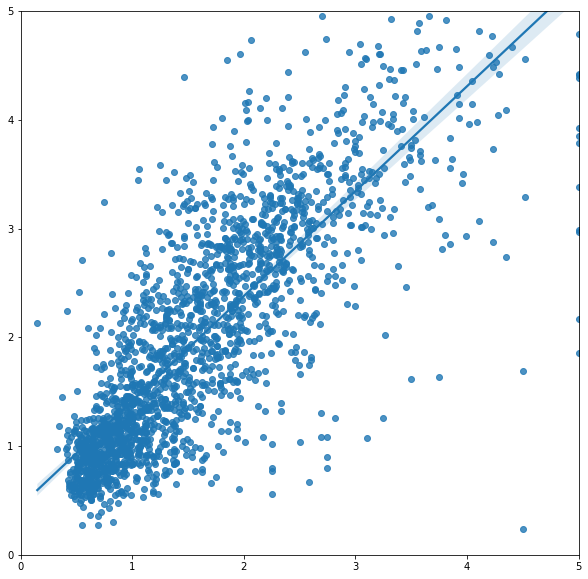

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 